![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Funções inversas e algoritmos de cálculo de raízes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 0: Inversa em um intervalo

Se a função $f: [a,b] \to R$ é injetiva em $[a,b]$,
ela possui uma inversa $g$, definida da imagem de $f$ e com valores no intervalo $[a,b]$.

Explique porque $f$ ser contínua e monótona garante que $f(x) = y$
sempre terá uma única raiz para $y$ entre $f(a)$ e $f(b)$.

Conclua que a bisseção sempre funciona neste caso.

Por ser monótona, a função ou sempre cresce ou sempre decresce, então para cada $y$ só há no máximo um $x$ associado, visto que no resto do intervalo, estará sempre acima ou abaixo desse ponto. No entanto, somente isso não garante que ela passe por esse ou qualquer ponto, isto é, pode haver um y em que $f(x)$ não está definida, uma descontinuidade. A bisseção não funcionaria nesse caso. Por isso, precisa ser também contínua. Dessa forma, a função passa - com certeza - em todos os pontos e uma única vez. Logo, existe uma única raíz para $f(x) = y$ para algum $y$ entre $f(a)$ e $f(b)$. 

Se, além disso, $f$ for derivável, isso garante que o método de Newton vai encontrar uma raiz para $f(x) = y$?

Dependendo da função, podem haver pontos que fazem o método entrar em loop e não conseguir divergir, pois fica alternando entre este ponto e algum outro, isso pode acontecer mesmo que a função seja contínua, monótona e derivável. Além disso, se a derivada em um ponto de uma função for zero, o método também não converge, pois o x seguinte seria o infinito.

# Parte 1: Usando a bisseção

## Questão 1: Implementação

Escreva uma função `biss_solve(f, y, a, b)` que encontra a solução de $f(x) = y$ no intervalo $[a,b]$,
supondo que $f$ é contínua e monótona neste intervalo.
Não esqueça de testar que, de fato, tem uma solução!

In [14]:
def biss_solve(f, y, a, b, xtol=1e-8, ytol=1e-8):
    """Bissects the interval  [a,b]  until an approximate solution to  f(x) = y  is found.
    Also returns the number of bissections"""
    eq = lambda x: f(x) - y
    m = (a+b)/2
    nbiss = 1
    if eq(a)==0:
        print(f"eq(a) = 0, a = {a}")
        return a, nbiss
    elif eq(b) == 0:
        print(f"eq(b) = 0, b = {b}")
        return b, nbiss
    while abs(b-a)>xtol and abs(eq(m))>ytol:
        eqm = eq(m)
        if eqm*eq(a) < 0:
            b = m
            m = (a+b)/2 
        elif eqm*eq(b) < 0:
            a = m
            m = (a+b)/2 
        elif eqm==0:
            print(f"eq(m) = 0, m = {m}")
            return m, nbiss
        else:
            return "Sem solução", nbiss
        nbiss+=1
    return m, nbiss

### Testes da bisseção

In [15]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(np.arcsin(0.5) - z1) < 1e-8
assert np.sin(z2) <= 1e-8 or abs(np.arcsin(0.5) - z2) < 1e-8

In [16]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert 20 <= n1 <= 30
assert 20 <= n2 <= 30

In [17]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert z1 == z2
assert n1 + 1 == n2

Explique os testes da caixa acima.

Duas bisseções foram chamadas para resolver a mesma equação, $sin(x) = 0.5$, mas com intervalos diferentes. O primeiro assert verifica se as duas retornaram a mesma raiz, o que é esperado, por serem a mesma equação. O segundo assert verifica se o número de iterações n2 é 1 a mais do que n1, isso ocorre porque o intervalo da segunda chamada é o dobro do intervalo da primeira. A primeira chamada já começa com $[0, \pi/2]$, já a segunda, com $[\pi/2,-\pi/2]$, só após a primeira iteração que a segunda chamada chega ao intervalo que começa a primeira.

### E mais testes...

In [18]:
z1, n1 = biss_solve(np.sin, 0.5, np.pi/2, 3*np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(np.pi - np.arcsin(0.5) - z1) < 1e-8
assert 20 <= n1 <= 30

In [19]:
z1, n1 = biss_solve(np.sin, 0.5, 5*np.pi/2, 3*np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(2*np.pi + np.arcsin(0.5) - z1) < 1e-8
assert 20 <= n1 <= 30

Comente os testes das duas caixas acima.

As duas caixas tem dois teste iguais: um para o erro em y da bisseção e outro para o número de iterações. O teste do erro é feito de duas formas, uma calculando a função na raíz retornada e outra calculando a inversa e subtraindo da raiz retornada. Apesar disso, os intervalos da bisseções são diferentes em cada caixa, na primeira o intervalo compreende o lado negativo do eixo x, na segunda, o positivo. Por este motivo e pela função sen(x) ter duas diferentes raízes para sen(x)=0.5, uma dentro do primeiro intervalo e outra no segundo, a segunda forma usada para testar o erro do y é diferente em cada caixa, pois z1 é diferente.

## Questão 2: Gráficos

Varie $y$ no intervalo $[0.05, 0.95]$ e faça o gráfico do número de iterações,
em função de y, para encontrar uma raiz de $\sin(x) = y$ no intervalo $[-\pi/2, \pi/2]$.

Use as tolerâncias padrão.

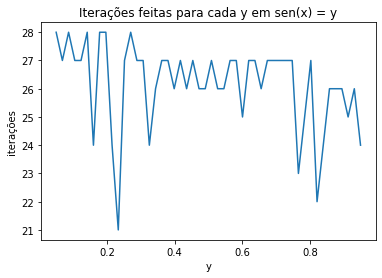

In [20]:
ys = np.linspace(0.05,0.95, num=50)
iters = [biss_solve(np.sin, y, -np.pi/2, np.pi/2)[1] for y in ys]
plt.plot(ys, iters)
plt.title("Iterações feitas para cada y em sen(x) = y")
plt.xlabel("y")
plt.ylabel("iterações")
ax = plt.gca()

In [21]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Faça, agora, o gráfico do erro em $x$ (usando `np.arcsin`) e em $y$.

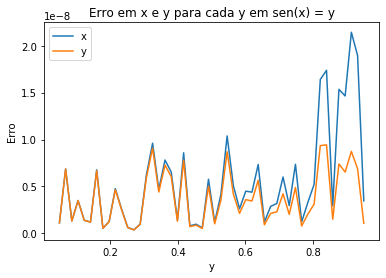

In [22]:
## Em dúvida se ta certo ##

ys = np.linspace(0.05,0.95, num=50)
xs = [biss_solve(np.sin, y, -np.pi/2, np.pi/2)[0] for y in ys]

erro_x = [abs(xs[i] - np.arcsin(ys[i])) for i in range(50)]
erro_y = [abs(np.sin(xs[i]) - ys[i]) for i in range(50)]

plt.plot(ys, erro_x, label="x")
plt.plot(ys,erro_y, label="y")
plt.title("Erro em x e y para cada y em sen(x) = y")
plt.xlabel("y")
plt.ylabel("Erro")
plt.legend()
ax = plt.gca()

In [23]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [24]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você percebe neste gráfico?

Os erros começam com valores iguais, oscilando em um intervalo em comum, com o aumento de y, o intervalo de valores do erro em x aumenta, enquanto que o erro em y permanece em geral no mesmo.

Faça um gráfico do quociente entre os erros.

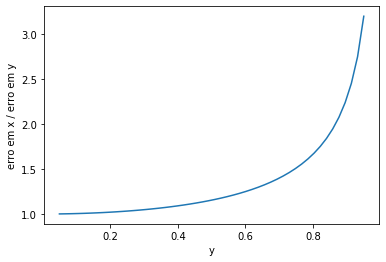

In [25]:
plt.plot(ys, [erro_x[i]/erro_y[i] for i in range(50)])
plt.xlabel("y")
plt.ylabel("erro em x / erro em y");

Como este gráfico ajuda a explicar o anterior?

Considerando o gráfico apenas do quociente entre os erros, podemos melhor ver o evolução da diferença entre os erros do gráfico anterior.

# Parte 2: Newton

## Questão 3: Implementação

Escreva uma função `newton_solve(f, df, y, x0)` que encontra uma solução de $f(x) = y$,
a partir de $x_0$.

In [ ]:
def newton_solve(f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f"""
    nevals = 0
    # YOUR CODE HERE
    raise NotImplementedError()

### Testes do algoritmo de Newton

In [ ]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert np.sin(z1) <= 1e-8 or abs(np.arcsin(0.5) - z1) < 1e-8
assert np.sin(z2) <= 1e-8 or abs(np.arcsin(0.5) - z2) < 1e-8

In [ ]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert 3 <= n1 <= 6
assert 3 <= n2 <= 6

In [ ]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert z1 == z2
assert n1 == n2 + 1

Explique os testes da caixa acima, e compare com o teste equivalente para a bisseção.

YOUR ANSWER HERE

### E mais testes...

In [ ]:
z0, n0 = newton_solve(np.sin, np.cos, 0.5, 0)

for n in range(1,100):
    z1, n1 = newton_solve(np.sin, np.cos, 0.5, 2*n*np.pi)
    assert np.sin(z1) <= 1e-8 or abs(2*n*np.pi + np.arcsin(0.5) - z1) < 1e-8, n
    assert 2 <= n1 <= 6, n
    assert n1 == n0, n
    assert np.isclose(z1, z0 + (2*n*np.pi), atol=1e-15, rtol=1e-15), n

Comente a caixa anterior.

YOUR ANSWER HERE

## Questão 4: Gráficos

Varie $y$ no intervalo $[0.05, 0.95]$ e faça o gráfico do número de iterações,
em função de y, para encontrar uma raiz de $\sin(x) = y$ no intervalo $[-\pi/2, \pi/2]$.

Use as tolerâncias padrão.

In [ ]:
ys = np.linspace(0.05,0.95, num=50)
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Comente as diferenças entre este gráfico e o correpondente para a bisseção.

YOUR ANSWER HERE

Como você explica estas diferenças?

YOUR ANSWER HERE

Faça, agora, o gráfico do erro em $x$ (usando `np.arcsin`) e em $y$.

In [ ]:
ys = np.linspace(0.05,0.95, num=50)
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você percebe neste gráfico?
Em que sentido ele é similar ao correspondente à bisseção, e em que sentido ele é diferente?

Segue o mesmo comportamento do estudo da bisseção. Com o aumento de y o erro em x cresce. Ele é diferente pela ordem de grandeza do erro ser muito menor do que o da bisseção.


# Parte 3: Aproximações sucessivas

O método de Newton funciona bem quando o valor de $x_0$, candidato a raiz de $f(x) = y$,
está próximo da raiz real $x = f^{-1}(y)$.

Nesta parte, vamos investigar um pouco a ideia de "começar em um ponto conhecido e seguir daí em diante".

## Questão 5: Newton por partes

Implemente a função `newton_inv(f, df, ys, x0)`, que calcula todas as soluções de $f(x) = y$,
para cada $y$ no vetor `ys`, que supomos ordenado.
Use $x_0$ para iniciar o método, e depois use a raiz anterior para continuar.

In [ ]:
def newton_inv(f, df, ys, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  for each  y  in the list  ys.
    Returns two lists, one of the (approximate) roots, another of the iterations for each one."""
    xs     = []
    nevals = []
    # YOUR CODE HERE
    raise NotImplementedError()

    return xs, nevals

In [ ]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert len(xs) == len(ys)
assert len(ns) == len(ys)

In [ ]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert np.allclose(np.sin(xs), ys, atol=1e-12, rtol=1e-12)

In [ ]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert ns[0] == 1
assert np.all(3 <= np.array(ns[1:]))
assert np.all(np.array(ns[1:]) <= 6)

In [ ]:
ys = np.linspace(0,0.5,num=11)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-15, ytol=1e-15)
assert np.allclose(np.sin(xs), ys, atol=1e-15, rtol=1e-15)

## Questão 6: Gráficos

Faça um gráfico do número de iterações necessárias para calcular a inversa do seno,
em cada ponto do intervalo $[0, 0.9]$, com precisão de $10^{-15}$,
para os três métodos:
- bisseção
- Newton
- Newton por partes

In [ ]:
ys = np.linspace(0.,0.95, num=150)
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você observa?

YOUR ANSWER HERE

## Questão 7: Logaritmos e Exponenciais

In [ ]:
def mulinv(x):
    return 1/x

In [ ]:
x, n = newton_solve(np.log, mulinv, -0.1, 1)
assert np.isclose(np.log(x), -0.1)

In [ ]:
for y in [0.9, 0.99, 0.999, 0.9999, 0.99999]:
    print(y, newton_solve(np.log, mulinv, -y, 1))

In [ ]:
newton_solve(np.log, mulinv, -1.0, 1)

Explique o que aconteceu nas duas caixas acima.

YOUR ANSWER HERE

In [ ]:
print(newton_solve(np.log, mulinv, -1.99999, 1/np.e))
print(newton_solve(np.log, mulinv, -2.0, 1/np.e))

Explique porque esta caixa é semelhante às anteriores,
e o que isso sugere quanto à dificuldade de resolver, usando o método de Newton,
a equação $\log(x) = y$ para $y$ negativo.

YOUR ANSWER HERE

In [ ]:
ys = np.linspace(0,20,num=30)
xs, ns = newton_inv(np.log, mulinv, -ys, 1, xtol=1e-15, ytol=1e-15)
assert np.allclose(np.log(xs), -ys)

Explique porque o método de aproximações funciona.

YOUR ANSWER HERE

Qual seria a dificuldade para adaptar o método de "aproximação sucessiva" para a Bisseção?

YOUR ANSWER HERE

## Questão 8: Uma função parecida

Resolva a equação $\log(x) + 10^9 x = -20$.

In [ ]:
def f(x):
    return np.log(x) + 1e9*x
def df(x):
    return 1/x + 1e9

In [ ]:
# Dê sua resposta da forma
# x = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert np.isclose(f(x), -20, atol=1e-13, rtol=1e-13)